# Pokemon Image Classification (3 class classification)

Dataset Link - https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja

### Importing libraries

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Getting the number of classes

In [2]:
classes = os.listdir('Datasets/images/Train/')
classes

['Bulbasaur', 'Charmander', 'Pikachu']

In [3]:
os.listdir('Datasets/images/Test/')

['Bulbasaur', 'Charmander', 'Pikachu']

#### Getting the number of images present in training and testing data (folders)

In [4]:
folders = ['Train', 'Test']
for fol in folders:
    print(f"{fol} Data: ")
    for cls in classes:
        path = "Datasets/images/"+fol+"/"+cls
        count = len(os.listdir(path))
        print(f"Class '{cls}' has: {count} images.")
    print("\n")

Train Data: 
Class 'Bulbasaur' has: 101 images.
Class 'Charmander' has: 102 images.
Class 'Pikachu' has: 101 images.


Test Data: 
Class 'Bulbasaur' has: 41 images.
Class 'Charmander' has: 42 images.
Class 'Pikachu' has: 40 images.




### Data Loading

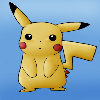

In [10]:
path = "Datasets/images/Train/Pikachu/296.jpg"
img = image.load_img(path, color_mode='rgb', target_size=(100,100))
img

In [12]:
path = "Datasets/images/Train/Pikachu/296.jpg"
img = image.load_img(path, color_mode='rgb', target_size=(100,100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

In [30]:
train_data = []   # similar to X
train_labels = [] # similar to y

for cls in classes:
    
    print(f"Current Class: {cls}")
    path_fol = "Datasets/images/Train/"+cls
    files = os.listdir(path_fol)
    
    for file in files:
        path = path_fol+"/"+file
        img = image.load_img(path, color_mode='rgb', target_size=(100,100))
        img = image.img_to_array(img)
        train_data.append(img)
        train_labels.append(cls)
    print(f"{cls} data appeneded in the list.")

Current Class: Bulbasaur
Bulbasaur data appeneded in the list.
Current Class: Charmander
Charmander data appeneded in the list.
Current Class: Pikachu
Pikachu data appeneded in the list.


In [31]:
len(train_data), len(train_labels)

(304, 304)

### Data Preprocessing

In [33]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [34]:
train_data.shape, train_labels.shape

((304, 100, 100, 3), (304,))

#### Encoding the labels

In [54]:
np.unique(train_labels)

array(['Bulbasaur', 'Charmander', 'Pikachu'], dtype='<U10')

In [49]:
category2labels = {'Bulbasaur':0, 'Charmander':1, 'Pikachu':2}
labels2category = {0:'Bulbasaur', 1:'Charmander', 2:'Pikachu'}

In [63]:
mapped_labels = np.array([category2labels[label] for label in train_labels])

#### converting target into one-hot encoding

In [64]:
mapped_labels = to_categorical(mapped_labels)

#### getting the data into X and y variables

In [65]:
X = train_data.reshape(train_data.shape[0], -1)
y = mapped_labels

In [66]:
X.shape, y.shape

((304, 30000), (304, 3))

In [67]:
X[:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
y[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### Model Building

In [72]:
model = Sequential(name="Model_for_Pokemon_image_classification")

model.add(Dense(name = "Dense_Layer_1", units=512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(name = "Dense_Layer_2", units=256, activation='relu'))
model.add(Dense(name = "Dense_Layer_3", units=128, activation='relu'))
model.add(Dense(name = "Dense_Layer_4", units=64, activation='relu'))
model.add(Dense(name = "Output_Layer", units=3, activation='softmax'))

In [76]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')
model.summary()

Model: "Model_for_Pokemon_image_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Layer_1 (Dense)       (None, 512)               15360512  
                                                                 
 Dense_Layer_2 (Dense)       (None, 256)               131328    
                                                                 
 Dense_Layer_3 (Dense)       (None, 128)               32896     
                                                                 
 Dense_Layer_4 (Dense)       (None, 64)                8256      
                                                                 
 Output_Layer (Dense)        (None, 3)                 195       
                                                                 
Total params: 15,533,187
Trainable params: 15,533,187
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(X,y, batch_size=64, epochs=100)

Epoch 1/100
5/5 [==============================] - 7s 488ms/step - loss: 3325.3823 - accuracy: 0.3487
Epoch 2/100
5/5 [==============================] - 3s 537ms/step - loss: 1975.2015 - accuracy: 0.3388
Epoch 3/100
5/5 [==============================] - 4s 750ms/step - loss: 1551.6689 - accuracy: 0.4079
Epoch 4/100
5/5 [==============================] - 4s 743ms/step - loss: 1193.9966 - accuracy: 0.3651
Epoch 5/100
5/5 [==============================] - 3s 658ms/step - loss: 1040.5240 - accuracy: 0.4408
Epoch 6/100
5/5 [==============================] - 4s 732ms/step - loss: 1056.2755 - accuracy: 0.4836
Epoch 7/100
5/5 [==============================] - 3s 497ms/step - loss: 601.3665 - accuracy: 0.5099
Epoch 8/100
5/5 [==============================] - 2s 354ms/step - loss: 612.6563 - accuracy: 0.5296
Epoch 9/100
5/5 [==============================] - 2s 379ms/step - loss: 498.0720 - accuracy: 0.6316
Epoch 10/100
5/5 [==============================] - 2s 357ms/step - loss: 321.8163 - 

5/5 [==============================] - 1s 289ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/100
5/5 [==============================] - 2s 304ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/100
5/5 [==============================] - 2s 530ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/100
5/5 [==============================] - 3s 500ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/100
5/5 [==============================] - 2s 387ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 87/100
5/5 [==============================] - 2s 332ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88/100
5/5 [==============================] - 2s 341ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 89/100
5/5 [==============================] - 2s 333ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 90/100
5/5 [==============================] - 2s 328ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 91/100
5/5 [==============================] - 2s 324ms/step - loss: 0.0

### Model Evaluation

#### getting test data

In [79]:
test_data = []   # similar to X
test_labels = [] # similar to y

for cls in classes:
    
    print(f"Current Class: {cls}")
    path_fol = "Datasets/images/Test/"+cls
    files = os.listdir(path_fol)
    
    for file in files:
        path = path_fol+"/"+file
        img = image.load_img(path, color_mode='rgb', target_size=(100,100))
        img = image.img_to_array(img)
        test_data.append(img)
        test_labels.append(cls)
    print(f"{cls} data appeneded in the list.")

Current Class: Bulbasaur
Bulbasaur data appeneded in the list.
Current Class: Charmander
Charmander data appeneded in the list.
Current Class: Pikachu
Pikachu data appeneded in the list.


In [80]:
len(test_data), len(test_labels)

(123, 123)

In [81]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)

#### Encoding the labels

In [90]:
np.unique(test_labels)

array(['Bulbasaur', 'Charmander', 'Pikachu'], dtype='<U10')

In [91]:
mapped_labels = np.array([category2labels[label] for label in test_labels])

#### converting target into one-hot encoding

In [92]:
mapped_labels = to_categorical(mapped_labels)
mapped_labels[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [96]:
X_test = test_data.reshape(test_data.shape[0],-1)
y_test = mapped_labels

In [97]:
X_test.shape, y_test.shape

((123, 30000), (123, 3))

In [99]:
loss, accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 84ms/step - loss: 13.6125 - accuracy: 0.9756


In [102]:
print(f"Loss: {loss}")
print(f"Accuracy: {round(accuracy*100,2)}%")

Loss: 13.612489700317383
Accuracy: 97.56%


In [104]:
y_pred_test = model.predict(X_test)
y_pred_test

4/4 [==============================] - 0s 79ms/step


array([[9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.000

In [106]:
y_pred_test = model.predict(X_test).argmax(axis=1)
y_pred_test[:10]

4/4 [==============================] - 0s 81ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [108]:
y_pred_test_category = [labels2category[p] for p in y_pred_test]
y_pred_test_category[:10]

['Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur']

#### predicting for 1 datapoint(image)

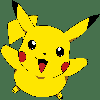

In [109]:
path = "Datasets/images/Test/Pikachu/2024.jpg"
img = image.load_img(path, color_mode='rgb', target_size=(100,100))
img

In [110]:
img = image.img_to_array(img)
img.shape

(100, 100, 3)

In [112]:
img = img.reshape(1,-1)
img.shape

(1, 30000)

In [116]:
pred = model.predict(img).argmax()
pred

1/1 [==============================] - 0s 71ms/step


2

In [117]:
labels2category[pred]

'Pikachu'

Credits - https://www.udemy.com/course/machine-learning-artificial-intelligence-essentials/